In [1]:
import numpy as np

# Step 1: Load the labels
Y_labels = np.genfromtxt('/home/darksst/Desktop/Fall24/StatisticalDecisionTheory/Data/Image/segmentation.data', 
                         delimiter=',', dtype=str, encoding=None, usecols=0, skip_header=5)

# Load the feature columns (usecols 5, 6, 7, 8, 9 for vedge-mean, vedge-sd, hedge-mean, hedge-sd, intensity-mean)
X = np.genfromtxt('/home/darksst/Desktop/Fall24/StatisticalDecisionTheory/Data/Image/segmentation.data', 
                  delimiter=',', dtype=float, encoding=None, usecols=(5, 6, 7, 8, 9), skip_header=5)

# Step 2: One-hot encode the class labels
unique_classes = np.unique(Y_labels)  # Get the unique class names
num_classes = len(unique_classes)

# Create a one-hot encoded matrix for the labels
Y = np.zeros((Y_labels.shape[0], num_classes))
for i, label in enumerate(Y_labels):
    Y[i, np.where(unique_classes == label)[0][0]] = 1

# Initialize the parameter matrix B with zeros
B = np.zeros((X.shape[1], Y.shape[1]))

# Print shapes to verify everything is correct
print(f"Feature matrix (X) shape: {X.shape}")
print(f"One-hot encoded labels (Y) shape: {Y.shape}")
print(f"Parameter matrix (B) shape: {B.shape}")


Feature matrix (X) shape: (210, 5)
One-hot encoded labels (Y) shape: (210, 7)
Parameter matrix (B) shape: (5, 7)


Final parameter matrix (B) after gradient descent:
 [[-1.11565457e-02  2.80777778e-04  3.64403993e-03 -1.82172075e-02
   3.90212343e-02 -8.07297171e-03 -5.49932713e-03]
 [-1.75492748e-01  2.64499256e-01  5.06411703e-02 -2.29041753e-01
   9.71567001e-02 -8.13986127e-02  7.36359873e-02]
 [ 1.17262116e-01 -5.63569749e-02  1.02660958e-01  1.77358074e-01
  -1.22998160e-01 -2.11380870e-01 -6.54514362e-03]
 [ 2.06150606e-01 -1.26913273e-01 -2.66915155e-02  1.54266945e-01
   6.80851435e-02  1.37868218e-01 -4.12766125e-01]
 [-2.48712794e-01  8.75024745e-02  7.32487509e-02 -3.59891457e-02
   8.51001649e-02 -8.75500746e-02  1.26400624e-01]]
Final negative log-likelihood after gradient descent: 1.8115049646864227


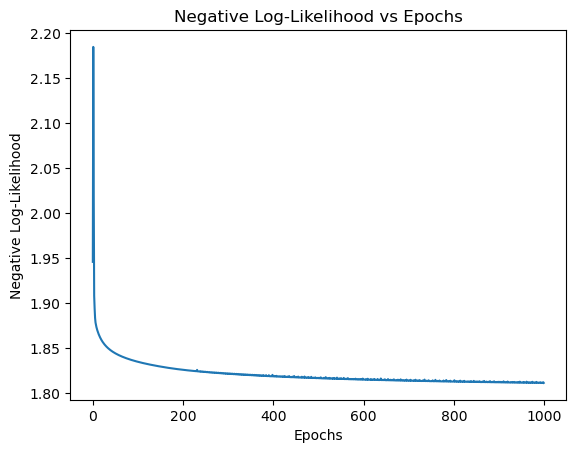

In [2]:
# Softmax function for converting logits to probabilities
def softmax(logits):
    exp_logits = np.exp(logits - np.max(logits, axis=1, keepdims=True))  
    return exp_logits / np.sum(exp_logits, axis=1, keepdims=True)

# Set hyperparameters
learning_rate = 1e-4  
epochs = 1000

# Initialize the parameter matrix B with zeros
B = np.zeros((X.shape[1], Y.shape[1]))

# Initialize array to store the negative log-likelihood at each epoch
neg_log_likelihood = np.zeros(epochs)

# Perform gradient descent
for epoch in range(epochs):
    # Step 1: Compute(Z = X @ B)
    logits = X @ B
    
    # Step 2: Apply softmax to compute the predicted probabilities
    P = softmax(logits)
    
    # Step 3: Compute the gradient (X.T @ (Y - P))
    gradient = X.T @ (Y - P)
    
    # Step 4: Update the parameters (B += learning_rate * gradient)
    B += learning_rate * gradient

    # Step 5: Compute the negative log-likelihood (cross-entropy loss)
    neg_log_likelihood[epoch] = -np.sum(Y * np.log(P + 1e-9)) / Y.shape[0]  # Adding 1e-9 to avoid log(0)

# Print final parameters and final negative log-likelihood after the last epoch
print("Final parameter matrix (B) after gradient descent:\n", B)
print("Final negative log-likelihood after gradient descent:", neg_log_likelihood[-1])

# Plot the negative log-likelihood over epochs
import matplotlib.pyplot as plt

plt.plot(range(epochs), neg_log_likelihood)
plt.xlabel('Epochs')
plt.ylabel('Negative Log-Likelihood')
plt.title('Negative Log-Likelihood vs Epochs')
plt.show()
